## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 005 Example 006A

In [1]:
import os
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline

Perform Test (001):      0 trials,      0 heads,      0 tails ->  0.0000 %
Perform Test (002):      2 trials,      1 heads,      1 tails -> 50.0000 %
Perform Test (003):     10 trials,      5 heads,      5 tails -> 50.0000 %
Perform Test (004):     20 trials,      9 heads,     11 tails -> 45.0000 %
Perform Test (005):     50 trials,     23 heads,     27 tails -> 46.0000 %
Perform Test (006):    500 trials,    246 heads,    254 tails -> 49.2000 %
Perform Test (007):   1000 trials,    488 heads,    512 tails -> 48.8000 %
Perform Test (008):  10000 trials,   4957 heads,   5043 tails -> 49.5700 %


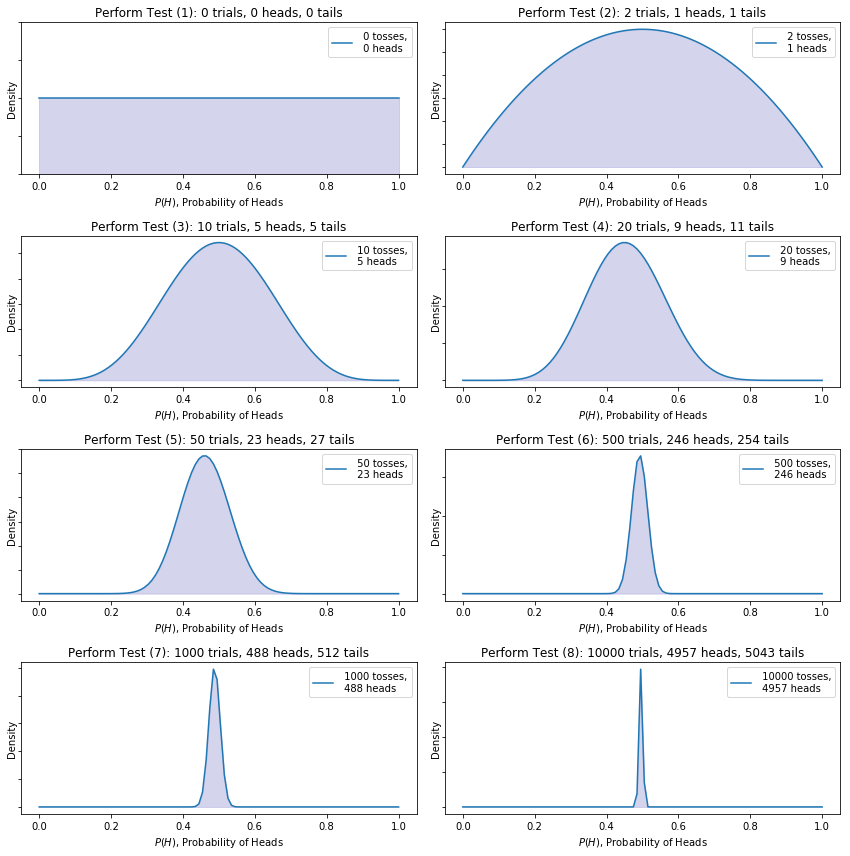

In [2]:
# Create a list of the number of coin tosses ("Bernoulli Trials")
number_of_trials = [0, 2, 10, 20, 50, 500, 1000, 10000]

# Fix seed for random state for reproducibility
np.random.seed(7)

# Conduct 10000 coin tosses and output into a list of 0s and 1s with 0 for a tail and 1 for a head
data = stats.bernoulli.rvs(0.5, size=number_of_trials[-1])
#print(data.shape)

# Discretise the x-axis into 100 separate plotting points
x = np.linspace(0, 1, 100)

for i, N in enumerate(number_of_trials):
    # Sum the total number of heads for each Bayesian update
    heads = float(data[:N].sum())
    tails = float(N - heads)
    if N == 0:
        p = 0.0
    else:
        p = round((heads/N)*100,3)
    print('Perform Test (%03d): %6d trials, %6d heads, %6d tails -> %7.4f %%' % ((i+1), N, heads, tails, p))

# Loops over the number_of_trials list to continually add
# extra coin toss data after every cycle. 
# For each new set of data, you modify the overall prior belief to form a new posterior. 
# This is known as a Beta-Binomial model.

fig=plt.figure(figsize=(12, 12))

for i, N in enumerate(number_of_trials):
    # Sum the total number of heads for each Bayesian update
    heads = data[:N].sum()
    tails = N - heads

    # Create an axes subplot for each Bayesian update 
    ax = plt.subplot(len(number_of_trials) / 2, 2, i + 1)
    ax.set_title('Perform Test (%d): %s trials, %s heads, %s tails' % ((i+1), N, heads,tails))

    # Add labels to both axes and hide labels on y-axis
    plt.xlabel('$P(H)$, Probability of Heads')
    plt.ylabel('Density')
    if i == 0:
        plt.ylim([0.0, 2.0])
    plt.setp(ax.get_yticklabels(), visible=False)

    # Create and plot a  Beta distribution to show the posterior belief in fairness of the coin.
    y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label=" %d tosses,\n %d heads" % (N, heads))
    plt.legend(loc='best')
    plt.fill_between(x, 0, y, color='#aaaadd', alpha=0.5)

# Expand plot to fill the full width/height and display results
plt.tight_layout()
plt.show()


In [3]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
graphName = 'Chapter-005-Example-006A-01.jpg'
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05',graphName])
fig.savefig(imagename, bbox_inches='tight')


C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 05


## Done

In [4]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-15 10:13:55.746618
